In [ ]:
!pip install prophet

In [1]:
import pandas as pd
from prophet import Prophet
#from prophet.plot import add_changepoints_to_plote

In [117]:
data = pd.read_csv('/content/time_series_covid19_deaths_global_updated.csv')
data

,Country/Region,India,US,Italy,Brazil
0,05-01-2020,1223,68518,28236,6412
1,05-02-2020,1323,70291,28710,6761
2,05-03-2020,1391,71492,28884,7051
3,05-04-2020,1566,72862,29079,7367
4,05-05-2020,1693,75041,29315,7938
...,...,...,...,...,...
544,10/27/21,456386,740630,131954,606952
545,10/28/21,457191,742490,132004,607325
546,10/29/21,457740,744224,132037,607733
547,10/30/21,458186,744626,132074,607949


In [118]:
ls = []   # 2021-6
for i in data['Country/Region'].iloc[-153:-92]:
  ls.append(pd.to_datetime((i)))
y = []   # 2021-6
for i in data['India'].iloc[-153:-92]:
  y.append(i)

In [119]:
df = pd.DataFrame()
df['ds'] = ls #pd.to_datetime(data['Country/Region'].iloc[:365])
#df['y'] = data['India'].iloc[:365]
#lis = data['India'].iloc[-153:-92]
df['y'] = y
#df['y'] = data['Italy']
#df['y'] = data['Brazil']
df

,ds,y
0,2021-06-01,335102
1,2021-06-02,337989
2,2021-06-03,340702
3,2021-06-04,344082
4,2021-06-05,346759
...,...,...
56,2021-07-27,422022
57,2021-07-28,422662
58,2021-07-29,423217
59,2021-07-30,423810


In [120]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplkc8nb7c/rcz1iuu0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplkc8nb7c/_kbe9rpe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79798', 'data', 'file=/tmp/tmplkc8nb7c/rcz1iuu0.json', 'init=/tmp/tmplkc8nb7c/_kbe9rpe.json', 'output', 'file=/tmp/tmplkc8nb7c/prophet_model0pqodylo/prophet_model-20240427080236.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:02:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:02:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [121]:
future = m.make_future_dataframe(periods=90,
                                 freq='D')

In [122]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower',
		'yhat_upper', 'trend',
		'trend_lower', 'trend_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
146,2021-10-25,488204.326356,360555.874265,619831.452917,488476.978478,360739.464136,619887.942514
147,2021-10-26,489290.066468,360204.333293,623640.791380,489214.829748,359706.290834,623363.058881
148,2021-10-27,489958.436493,358828.158365,627307.451032,489952.681017,358443.737128,626766.137788
149,2021-10-28,490916.370192,356219.185461,630915.704904,490690.532287,356276.229601,630791.900565
150,2021-10-29,491597.503663,356080.747676,633834.789350,491428.383556,356454.583437,633537.039360


In [123]:
f1 = forecast.iloc[-90:]

In [124]:
f1[['yhat', 'yhat_lower','yhat_upper',
    'trend','trend_lower', 'trend_upper']] = f1[['yhat','yhat_lower','yhat_upper',
                                                 'trend','trend_lower', 'trend_upper']] - 6000000

<ipython-input-124-997a5782f1a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1[['yhat', 'yhat_lower','yhat_upper',


In [125]:
ls_real = []
for i in data['Country/Region'].iloc[:]: # 2021-6
  ls_real.append(pd.to_datetime((i)))

In [126]:
rl_data = list(data['India'].iloc[:])

In [127]:
real_data = pd.DataFrame()
#real_data['ds'] = pd.to_datetime(data['Country/Region'].iloc[365:456])
real_data['ds'] = ls_real
real_data['y'] = rl_data

In [128]:
real_data.iloc[:-153]

,ds,y
0,2020-05-01,1223
1,2020-05-02,1323
2,2020-05-03,1391
3,2020-05-04,1566
4,2020-05-05,1693
...,...,...
391,2021-05-27,318895
392,2021-05-28,322512
393,2021-05-29,325972
394,2021-05-30,329100


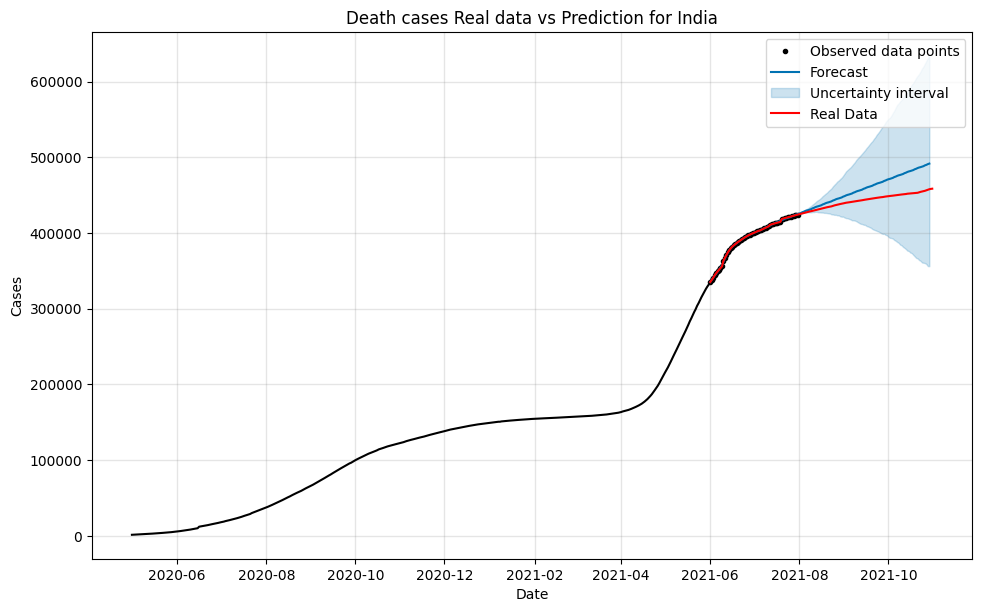

In [129]:
import matplotlib.pyplot as plt
from prophet.plot import plot

# Assuming forecast is your Prophet forecast object
#fig = plot(forecast, xlabel='Date', ylabel='Value')
# forecast.iloc[-90:]
fig1 = m.plot(forecast)
# Assuming real_data is your real data for the forecast period
plt.plot(real_data['ds'].iloc[:-153], real_data['y'].iloc[:-153], 'k', markersize=2)
plt.plot(real_data['ds'].iloc[-153:], real_data['y'].iloc[-153:], 'r', markersize=2, label='Real Data')

plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('Death cases Real data vs Prediction for India')
# You may need to adjust the plot settings for better visualization
plt.legend()
plt.show()


In [ ]:
import numpy as np
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Perform cross-validation
df_cv = cross_validation(m, initial='320 days', period='45 days', horizon='30 days')

# Calculate performance metrics
df_metrics = performance_metrics(df_cv)

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(df_cv['y'], df_cv['yhat'])
mse = mean_squared_error(df_cv['y'], df_cv['yhat'])
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

In [ ]:
!pip install wandb

In [ ]:
import wandb

In [ ]:
wandb.login(key='4966bf774ea7ce7b47a6e7360b1fad927ece6f1c')


wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
sweep_config = {
    'method': 'grid',
    'name' : 'sweep 4',
    'metric': {
        'name': 'mean_absolute_error',
        'goal': 'minimize'
    },
    'parameters': {
        'seasonality_mode': {
            'values': ['additive', 'multiplicative']},
        'changepoint_prior_scale': {
            'values': [0.01, 0.1, 0.5]},
        'seasonality_prior_scale': {
            'values': [1, 10, 30]}
        }
}

In [ ]:
# Helper function to evaluate the model
def evaluate_model(model, metric_func):
    df_cv = cross_validation(model, initial='320 days', period='45 days', horizon='30 days')
    return metric_func(df_cv['y'], df_cv['yhat'])

In [ ]:
import numpy as np
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Initialize sweep
sweep_id = wandb.sweep(sweep_config, project='Modelling workshop')
best_params = {}
best_score = float('inf')
def main():

    with wandb.init() as run:
        run_name = f"-sm_{wandb.config.seasonality_mode}--cps_{wandb.config.changepoint_prior_scale}\
                    _sps-{wandb.config.seasonality_prior_scale}"
        wandb.run.name = run_name
        model = Prophet(seasonality_mode=wandb.config.seasonality_mode,
                        changepoint_prior_scale=wandb.config.changepoint_prior_scale,
                        seasonality_prior_scale=wandb.config.seasonality_prior_scale)
        model.fit(df)

        # Evaluate the model using Mean Absolute Error (MAE)
        score = evaluate_model(model, mean_absolute_error)
        wandb.log({"mean absolute error": score})
        # Update best parameters if necessary
        '''if score < best_score:
            best_score = score
            best_params = {
                'seasonality_mode': wandb.config.seasonality_mode,
                'changepoint_prior_scale': wandb.config.changepoint_prior_scale,
                'seasonality_prior_scale': wandb.config.seasonality_prior_scale
            }'''


# Run the sweep
wandb.agent(sweep_id, function=main, count = 30)
wandb.finish()
print(best_params)
print(best_score)

# Create the best model with the optimal hyperparameters
best_model = Prophet(**best_params)
best_model.fit(df)

In [ ]:
best_params

{}

In [ ]:
best_params = {'seasonality_mode': 'additive',
                'changepoint_prior_scale': 0.5,
                'seasonality_prior_scale': 30}

In [ ]:
best_model = Prophet(**best_params)
best_model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0ly3q7k/di068aoa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0ly3q7k/qpbobqkt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7638', 'data', 'file=/tmp/tmpx0ly3q7k/di068aoa.json', 'init=/tmp/tmpx0ly3q7k/qpbobqkt.json', 'output', 'file=/tmp/tmpx0ly3q7k/prophet_modelb49g1yi3/prophet_model-20240414105647.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:56:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:56:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = best_model.make_future_dataframe(periods=90,
                                                freq='D')

In [ ]:
forecast = best_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower',
		'yhat_upper', 'trend',
		'trend_lower', 'trend_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
450,2021-07-25,3.780595e+07,3.353549e+07,4.230635e+07,3.780604e+07,3.353988e+07,4.231609e+07
451,2021-07-26,3.785750e+07,3.350427e+07,4.246730e+07,3.786788e+07,3.351154e+07,4.247085e+07
452,2021-07-27,3.791900e+07,3.349360e+07,4.260941e+07,3.792972e+07,3.349452e+07,4.259531e+07
453,2021-07-28,3.798434e+07,3.346409e+07,4.274134e+07,3.799156e+07,3.347233e+07,4.272570e+07
454,2021-07-29,3.805540e+07,3.347735e+07,4.289703e+07,3.805340e+07,3.345573e+07,4.289013e+07


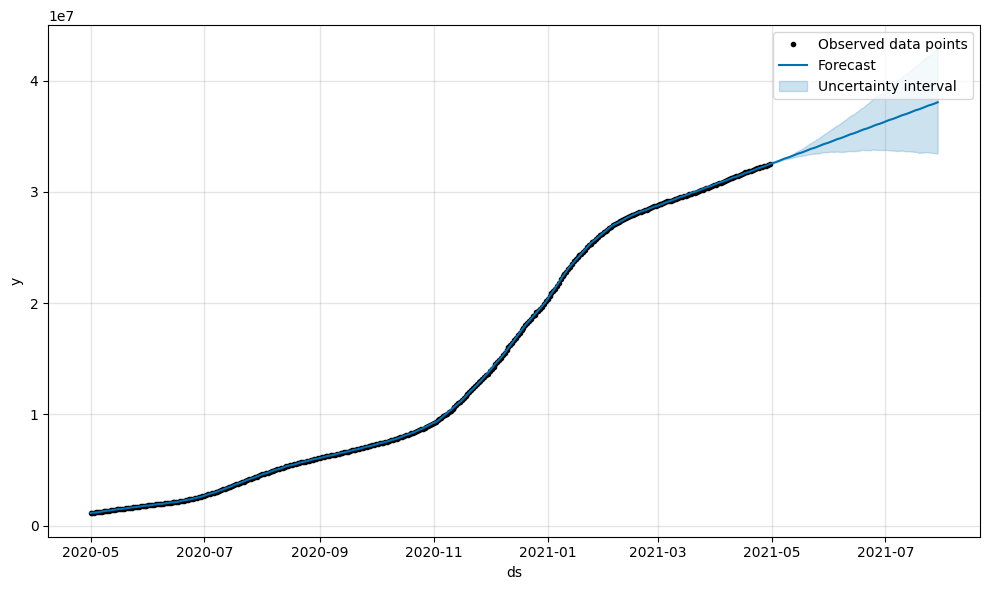

In [ ]:
fig1 = best_model.plot(forecast, include_legend=True)

In [ ]:
fig1 = m.plot(forecast, include_legend=True)

In [ ]:
ls_real = []
for i in data['Country/Region'].iloc[365:456]:
  ls_real.append(pd.to_datetime((i)))

In [ ]:
rl_data = list(data['US'].iloc[365:456])

In [ ]:
real_data = pd.DataFrame()
#real_data['ds'] = pd.to_datetime(data['Country/Region'].iloc[365:456])
real_data['ds'] = ls_real
real_data['y'] = rl_data

In [ ]:
real_data

,ds,y
0,2021-05-01,32516226
1,2021-05-02,32546822
2,2021-05-03,32592222
3,2021-05-04,32634949
4,2021-05-05,32680744
...,...,...
86,2021-07-26,34660435
87,2021-07-27,34725586
88,2021-07-28,34799156
89,2021-07-29,34871512


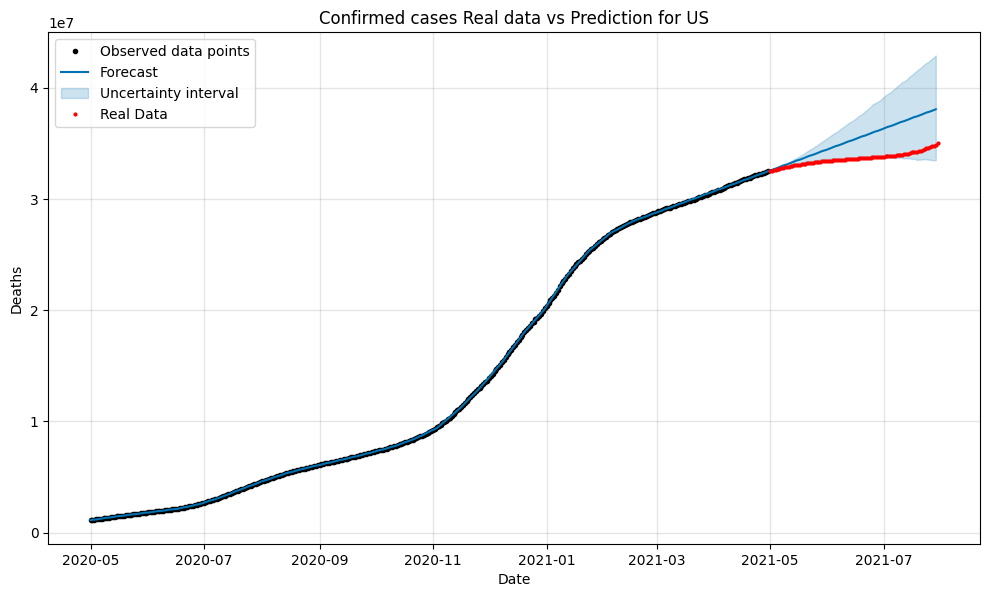

In [ ]:
import matplotlib.pyplot as plt
from prophet.plot import plot

# Assuming forecast is your Prophet forecast object
#fig = plot(forecast, xlabel='Date', ylabel='Value')
fig1 = best_model.plot(forecast, include_legend=True)
# Assuming real_data is your real data for the forecast period
plt.plot(real_data['ds'], real_data['y'], 'ro', markersize=2, label='Real Data')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Confirmed cases Real data vs Prediction for US')
# You may need to adjust the plot settings for better visualization
plt.legend()
plt.show()


In [ ]:
from prophet.diagnostics import cross_validation
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

# Define the hyperparameter grid
param_grid = {
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_prior_scale': [1, 10, 30],
}

# Helper function to evaluate the model
def evaluate_model(model, metric_func):
    df_cv = cross_validation(model, initial='320 days', period='45 days', horizon='30 days')
    return metric_func(df_cv['y'], df_cv['yhat'])




# Grid search
best_params = {}
best_score = float('inf')

for mode in param_grid['seasonality_mode']:
    for cps in param_grid['changepoint_prior_scale']:
        for sps in param_grid['seasonality_prior_scale']:
            # Create a model with the current hyperparameters
            model = Prophet(seasonality_mode=mode, changepoint_prior_scale=cps, seasonality_prior_scale=sps)
            model.fit(df)

            # Evaluate the model using Mean Absolute Error (MAE)
            score = evaluate_model(model, mean_absolute_error)

            # Update best parameters if necessary
            if score < best_score:
                best_score = score
                best_params = {
                    'seasonality_mode': mode,
                    'changepoint_prior_scale': cps,
                    'seasonality_prior_scale': sps
                }

print(best_params)
print(best_score)

# Create the best model with the optimal hyperparameters
best_model = Prophet(**best_params)
best_model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/ojp0rq2e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/hwoxzysz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44877', 'data', 'file=/tmp/tmp3b5g__kb/ojp0rq2e.json', 'init=/tmp/tmp3b5g__kb/hwoxzysz.json', 'output', 'file=/tmp/tmp3b5g__kb/prophet_model6frn1uwv/prophet_model-20240414081619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 1 forecasts with cut

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/_878a4jp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/a2393n2u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88354', 'data', 'file=/tmp/tmp3b5g__kb/_878a4jp.json', 'init=/tmp/tmp3b5g__kb/a2393n2u.json', 'output', 'file=/tmp/tmp3b5g__kb/prophet_modeltm25opgl/prophet_model-20240414081619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/e9p4d_3_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/ucd27qas.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30469', 'data', 'file=/tmp/tmp3b5g__kb/e9p4d_3_.json', 'init=/tmp/tmp3b5g__kb/ucd27qas.json', 'output', 'file=/tmp/tmp3b5g__kb/prophet_model2cb8ea0i/prophet_model-20240414081620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/jv3bqlr3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/0q7ahs7b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55672', 'data', 'file=/tmp/tmp3b5g__kb/jv3bqlr3.json', 'init=/tmp/tmp3b5g__kb/0q7ahs7b.json', 'output', 'file=/tmp/tmp3b5g__kb/prophet_model_jcfi9bj/prophet_model-20240414081621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/ji1ausg_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/a8jy6k4s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43400', 'data', 'file=/tmp/tmp3b5g__kb/ji1ausg_.json', 'init=/tmp/tmp3b5g__kb/a8jy6k4s.json', 'output', 'file=/tmp/tmp3b5g__kb/prophet_model5wdbr1ay/prophet_model-20240414081621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/9ongquto.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/m96tn0b3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85753', 'data', 'file=/tmp/tmp3b5g__kb/9ongquto.json', 'init=/tmp/tmp3b5g__kb/m96tn0b3.json', 'output', 'file=/tmp/tmp3b5g__kb/prophet_modelwfudl37l/prophet_model-20240414081622.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/rnajeeh0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/hp45sgny.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34169', 'data', 'file=/tmp/tmp3b5g__kb/rnajeeh0.json', 'init=/tmp/tmp3b5g__kb/hp45sgny.json', 'output', 'file=/tmp/tmp3b5g__kb/prophet_model9j_b18ih/prophet_model-20240414081623.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/2unebcvy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/v70wc3hp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24686', 'data', 'file=/tmp/tmp3b5g__kb/2unebcvy.json', 'init=/tmp/tmp3b5g__kb/v70wc3hp.json', 'output', 'file=/tmp/tmp3b5g__kb/prophet_model8qq8c221/prophet_model-20240414081623.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/h9z9s0c7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/kdy1ejv7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80163', 'data', 'file=/tmp/tmp3b5g__kb/h9z9s0c7.json', 'init=/tmp/tmp3b5g__kb/kdy1ejv7.json', 'output', 'file=/tmp/tmp3b5g__kb/prophet_modellou4n1kc/prophet_model-20240414081624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/p7fyqti9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/6_yhovam.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24388', 'data', 'file=/tmp/tmp3b5g__kb/p7fyqti9.json', 'init=/tmp/tmp3b5g__kb/6_yhovam.json', 'output', 'file=/tmp/tmp3b5g__kb/prophet_modelwv96p74f/prophet_model-20240414081624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/nvaixkf2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/bsff8wvb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36600', 'data', 'file=/tmp/tmp3b5g__kb/nvaixkf2.json', 'init=/tmp/tmp3b5g__kb/bsff8wvb.json', 'output', 'file=/tmp/tmp3b5g__kb/prophet_modelisrgzfnc/prophet_model-20240414081625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/a8i84115.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/vvt9s209.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31450', 'data', 'file=/tmp/tmp3b5g__kb/a8i84115.json', 'init=/tmp/tmp3b5g__kb/vvt9s209.json', 'output', 'file=/tmp/tmp3b5g__kb/prophet_modelwv7e7w4n/prophet_model-20240414081625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/lamgasvo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/c2lqt4yi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59473', 'data', 'file=/tmp/tmp3b5g__kb/lamgasvo.json', 'init=/tmp/tmp3b5g__kb/c2lqt4yi.json', 'output', 'file=/tmp/tmp3b5g__kb/prophet_modelbwtobk6u/prophet_model-20240414081625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/f9fuustb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/utdce20w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92201', 'data', 'file=/tmp/tmp3b5g__kb/f9fuustb.json', 'init=/tmp/tmp3b5g__kb/utdce20w.json', 'output', 'file=/tmp/tmp3b5g__kb/prophet_modelkm1p8h6a/prophet_model-20240414081626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/yn6_iw12.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/5qy619zr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79423', 'data', 'file=/tmp/tmp3b5g__kb/yn6_iw12.json', 'init=/tmp/tmp3b5g__kb/5qy619zr.json', 'output', 'file=/tmp/tmp3b5g__kb/prophet_model_0l0xzy3/prophet_model-20240414081626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/7fokh9r4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/8_efzp6h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38610', 'data', 'file=/tmp/tmp3b5g__kb/7fokh9r4.json', 'init=/tmp/tmp3b5g__kb/8_efzp6h.json', 'output', 'file=/tmp/tmp3b5g__kb/prophet_model6idl8otp/prophet_model-20240414081627.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/8538_hgp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/98_5kv_n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46709', 'data', 'file=/tmp/tmp3b5g__kb/8538_hgp.json', 'init=/tmp/tmp3b5g__kb/98_5kv_n.json', 'output', 'file=/tmp/tmp3b5g__kb/prophet_model6_zkhdij/prophet_model-20240414081627.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/xxzcjf6q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/0ndhlyc9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94356', 'data', 'file=/tmp/tmp3b5g__kb/xxzcjf6q.json', 'init=/tmp/tmp3b5g__kb/0ndhlyc9.json', 'output', 'file=/tmp/tmp3b5g__kb/prophet_modelgdphlyck/prophet_model-20240414081628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/72ugekd_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3b5g__kb/ysftqfdy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47488', 'data', 'file=/tmp/tmp3b5g__kb/72ugekd_.json', 'init=/tmp/tmp3b5g__kb/ysftqfdy.json', 'output', 'file=/tmp/tmp3b5g__kb/prophet_modelvh9xr1kt/prophet_model-20240414081628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

{'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 30}
2797548.3101026653
